In [41]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [42]:
df = pd.read_csv('./Base_Estado.csv')
df.head()

,Diahora,Estado,Temperatura Maxima,Temperatura Minima,regiao,consumo,mes,ano,mesano,dia_num
0,2013-01-01,AM,29.788235,23.317647,n,3564,1,2013,2013-01-01,1
1,2013-01-01,AP,28.900000,22.700000,n,3564,1,2013,2013-01-01,1
2,2013-01-01,MA,31.966667,23.508333,n,3564,1,2013,2013-01-01,1
3,2013-01-01,PA,30.790476,23.235000,n,3564,1,2013,2013-01-01,1
4,2013-01-01,TO,32.445455,22.290000,n,3564,1,2013,2013-01-01,1


In [43]:
#ajusta o nomes das colunas
df.rename(columns = {
                    'Diahora' : 'dia',
                    'Estado' : 'uf',
                    'Temperatura Maxima' : 'temp_max',
                    'Temperatura Minima' : 'temp_min',
                    }, inplace = True)

In [44]:
#converte os campos de data para data
df['dia'] = df.dia.astype('datetime64[ms]')
df['mesano'] = df.mesano.astype('datetime64[ms]')

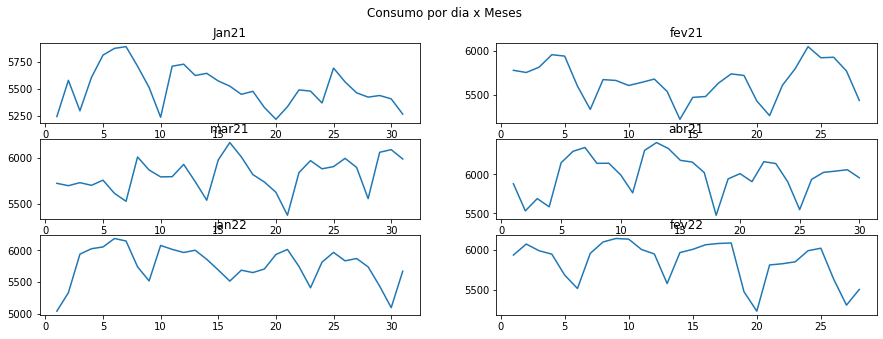

In [45]:
df_jan21 = df[(df.regiao == 'n') & (df.ano == 2021) & (df.mes == 1)].groupby(['dia_num'])[["consumo","temp_max", "temp_min"]].mean().reset_index()
df_fev21 = df[(df.regiao == 'n') & (df.ano == 2021) & (df.mes == 2)].groupby(['dia_num'])[["consumo","temp_max", "temp_min"]].mean().reset_index()
df_mar21 = df[(df.regiao == 'n') & (df.ano == 2021) & (df.mes == 3)].groupby(['dia_num'])[["consumo","temp_max", "temp_min"]].mean().reset_index()
df_abr21 = df[(df.regiao == 'n') & (df.ano == 2021) & (df.mes == 4)].groupby(['dia_num'])[["consumo","temp_max", "temp_min"]].mean().reset_index()
df_jan22 = df[(df.regiao == 'n') & (df.ano == 2022) & (df.mes == 1)].groupby(['dia_num'])[["consumo","temp_max", "temp_min"]].mean().reset_index()
df_fev22 = df[(df.regiao == 'n') & (df.ano == 2022) & (df.mes == 2)].groupby(['dia_num'])[["consumo","temp_max", "temp_min"]].mean().reset_index()

fig = plt.figure(figsize=(15,5))
plt.suptitle("Consumo por dia x Meses")

plt.subplot(3,2,1)
plt.title("Jan21")
plt.plot(df_jan21.dia_num, df_jan21.consumo, label = 'jan21')

plt.subplot(3,2,2)
plt.title("fev21",)
plt.plot(df_fev21.dia_num, df_fev21.consumo, label = 'fev21')

plt.subplot(3,2,3)
plt.title("mar21")
plt.plot(df_mar21.dia_num, df_mar21.consumo, label = 'mar21')

plt.subplot(3,2,4)
plt.title("abr21")
plt.plot(df_abr21.dia_num, df_abr21.consumo, label = 'abr21')

plt.subplot(3,2,5)
plt.title("jan22")
plt.plot(df_jan22.dia_num, df_jan22.consumo, label = 'jan22')

plt.subplot(3,2,6)
plt.title("fev22")
plt.plot(df_fev22.dia_num, df_fev22.consumo, label = 'fev22')


plt.show()

In [46]:
#@markdown Bibliotecas 

import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
import statsmodels.api as qqplot
import scipy.stats as stats

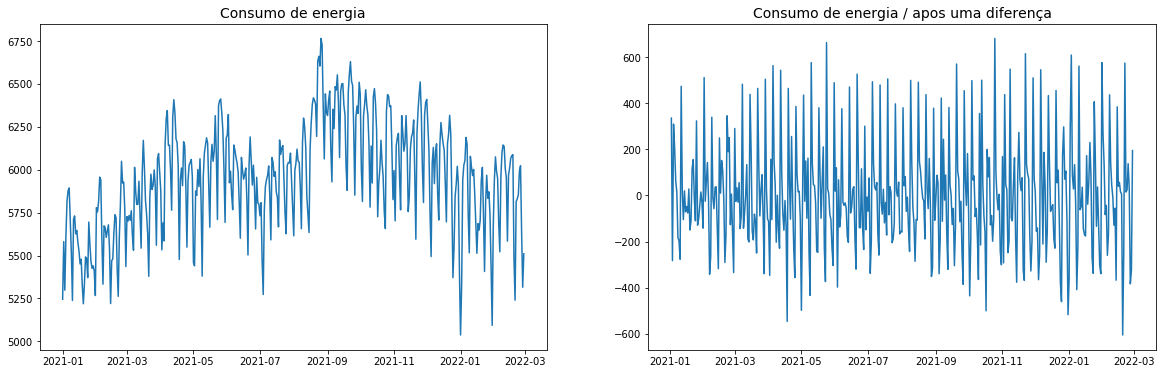

In [47]:
#base completa
index_data = pd.date_range(start='1/1/2021', end='28/02/2022', freq='d')
df_arima = df[(df.regiao == 'n') & (df.dia >= '2021-01-01')].groupby(["dia"])[["consumo"]].mean().reset_index()
df_arima.index=index_data

fig,(ax1, ax2) = plt.subplots(1,2,figsize=(20,6))

ax1.plot(df_arima.index, df_arima.consumo)
ax1.set_title("Consumo de energia", fontdict = {'fontsize' : 14})

ax2.plot(df_arima.index, df_arima.consumo.diff())
ax2.set_title("Consumo de energia / apos uma diferença", fontdict = {'fontsize' : 14})

plt.show()

In [48]:
df_arima.head(500)

,dia,consumo
2021-01-01,2021-01-01,5245
2021-01-02,2021-01-02,5581
2021-01-03,2021-01-03,5298
2021-01-04,2021-01-04,5608
2021-01-05,2021-01-05,5815
...,...,...
2022-02-24,2022-02-24,5992
2022-02-25,2022-02-25,6023
2022-02-26,2022-02-26,5639
2022-02-27,2022-02-27,5315


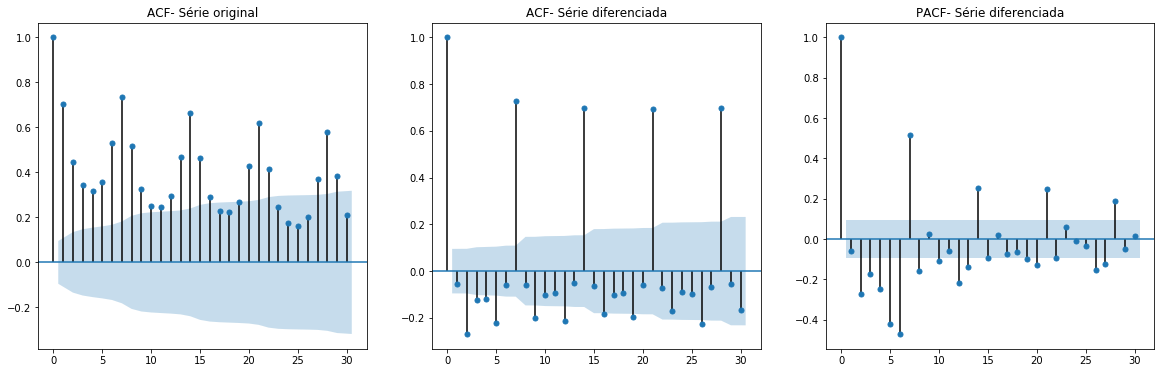

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,6))

y=plot_acf(df_arima.consumo, lags=30, ax=ax1, title="ACF- Série original")
y1=plot_acf(df_arima.consumo.diff().dropna(), lags=30, ax=ax2, title="ACF- Série diferenciada")
y2=plot_pacf(df_arima.consumo.diff().dropna(),ax=ax3, lags=30, title="PACF- Série diferenciada");

In [50]:
# Ajustando o modelo ARIMA
model_1=ARIMA(df_arima.consumo, order=(15, 1, 0)) # p=range de confiança, d=1, q= versão modelo
res=model_1.fit()
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.consumo   No. Observations:                  423
Model:                ARIMA(15, 1, 0)   Log Likelihood               -2685.814
Method:                       css-mle   S.D. of innovations            137.221
Date:                Wed, 04 May 2022   AIC                           5405.627
Time:                        17:32:35   BIC                           5474.433
Sample:                    01-02-2021   HQIC                          5432.814
                         - 02-28-2022                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4437      2.128      0.208      0.835      -3.728       4.615
ar.L1.D.consumo     -0.1375      0.049     -2.798      0.005      -0.234      -0.041
ar.L2.D.consumo     -0.3707 

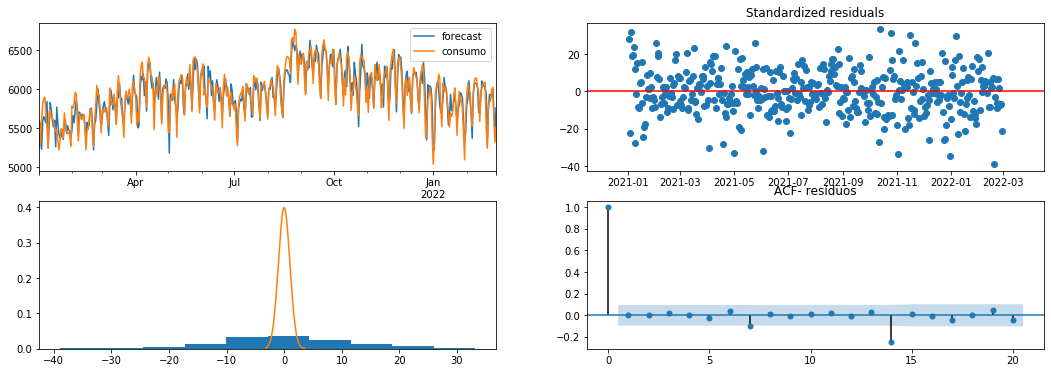

In [51]:
#@markdown Arima - Gráficos do ajuste
fig,axs = plt.subplots(2, 2,figsize=(18,6))

#axs[0,0].plot(res.predict(typ='levels'),color="red")
#axs[0,0].plot(df.valor,color="blue")
res.plot_predict(dynamic=False, ax=axs[0,0])

axs[0,1].scatter(df_arima.index[1:len(df_arima)],(res.resid-res.resid.mean())/np.sqrt(res.resid.std())) #standardized residuals
axs[0,1].axhline(y=0, color='r', linestyle='-')

axs[0,1].set_title('Standardized residuals')

axs[1,0].hist((res.resid-res.resid.mean())/np.sqrt(res.resid.std()), density=True);
x=np.sort(np.random.normal(0, 1, 1000))
axs[1,0].plot(x, stats.norm.pdf(x, 0, 1))

x=plot_acf(res.resid, lags=20, ax=axs[1,1], title="ACF- resíduos");
#x1=plot_pacf(res.resid, lags=20, ax=axs[1,1], title="PACF- resíduos")

In [52]:
# Ajustando o modelo ARIMA (treinamento)

a=len(df_arima)-7 #o numero 7 foi o ajuste do "inicio da mes pra mar/22"
train = df_arima.consumo[:a]
test = df_arima.consumo[a:]

model_1=ARIMA(train, order=(15, 1, 0))
res=model_1.fit()
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.consumo   No. Observations:                  416
Model:                ARIMA(15, 1, 0)   Log Likelihood               -2642.225
Method:                       css-mle   S.D. of innovations            137.462
Date:                Wed, 04 May 2022   AIC                           5318.450
Time:                        17:35:17   BIC                           5386.972
Sample:                    01-02-2021   HQIC                          5345.544
                         - 02-21-2022                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8230      2.096      0.393      0.695      -3.286       4.932
ar.L1.D.consumo     -0.1408      0.049     -2.850      0.004      -0.238      -0.044
ar.L2.D.consumo     -0.3686 

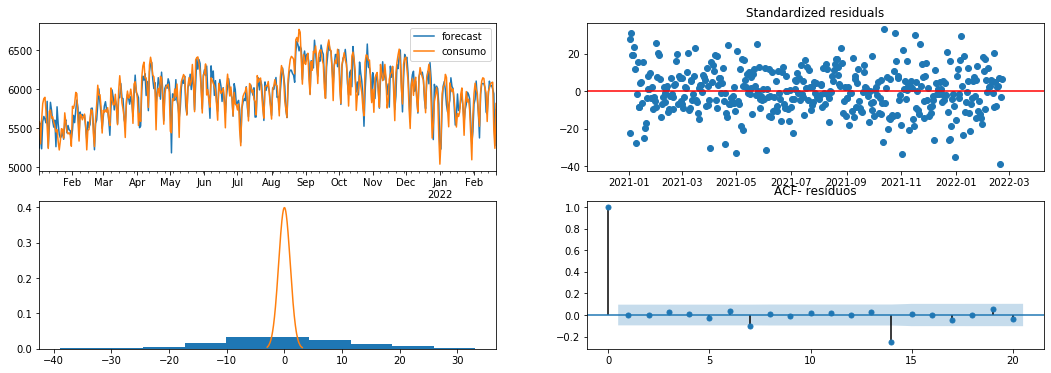

In [53]:
#@markdown Arima - Gráficos do ajuste
fig,axs = plt.subplots(2, 2,figsize=(18,6))

#axs[0,0].plot(res.predict(typ='levels'),color="red")
#axs[0,0].plot(df.valor,color="blue")
res.plot_predict(dynamic=False, ax=axs[0,0])

axs[0,1].scatter(df_arima.index[1:len(train)],(res.resid-res.resid.mean())/np.sqrt(res.resid.std())) #standardized residuals
axs[0,1].axhline(y=0, color='r', linestyle='-')

axs[0,1].set_title('Standardized residuals')

axs[1,0].hist((res.resid-res.resid.mean())/np.sqrt(res.resid.std()), density=True);
x=np.sort(np.random.normal(0, 1, 1000))
axs[1,0].plot(x, stats.norm.pdf(x, 0, 1))

x=plot_acf(res.resid, lags=20, ax=axs[1,1], title="ACF- resíduos");
#x1=plot_pacf(res.resid, lags=20, ax=axs[1,1], title="PACF- resíduos")

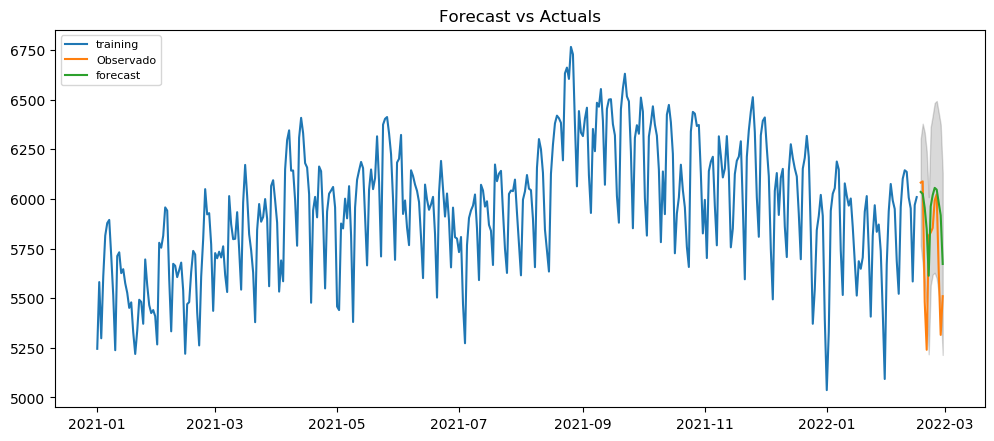

In [54]:
#@markdown forecast h=12

# Chamar df sua base de dados e valor as observações da série

# Create Training and Test
a=len(df_arima)-12*1
train = df_arima.consumo[:(a-1)]
test = df_arima.consumo[a:]

# Build Model
model = ARIMA(train, order=(15, 1, 0))  
fitted = model.fit()  
#print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(len(df_arima.consumo[a:]), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='Observado')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

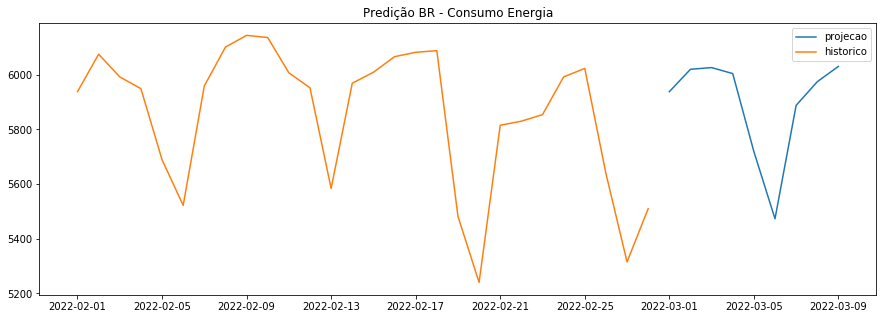

In [55]:
#gerando o resultado
dias = 9 #digite a quantidade de dias para a projeção

#tratamentos da projeção
resultado = (res.forecast(dias))
resultado_arima = pd.DataFrame(resultado[0])
resultado_arima.set_axis(['consumo'],axis='columns', inplace=True)
index_data = pd.date_range(start='3/1/2022', end='3/9/2022', freq='d')  #caso altere o dia, altere aqui tbm
resultado_arima.index = index_data

#historico
df_hist = df_arima[(df_arima.dia >= '2022-02-01')]


plt.figure(figsize = (15,5))
plt.title("Predição BR - Consumo Energia")
plt.plot(resultado_arima.index, resultado_arima.consumo, label = 'projecao')
plt.plot(df_hist.index, df_hist.consumo, label = 'historico')

plt.legend()
plt.show()

In [56]:
#acuracia do modelo

#@markdown acuracia

#mape é a taxa de erro

#modelo 0 
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape 
            #,'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse
               })

forecast_accuracy(fc, test.values)

{'mape': 0.04364851474509848}